# Spam Filtering Techniques for Short Message Service
## EPFL - Adaptation and Learning (EE-621) 
## Adrien Besson and Dimitris Perdios

This notebook presents the data exploration steps of the project described in Section I of the report.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import os
from wordcloud import WordCloud

We first load the dataset using Pandas.

In [2]:
# Load dataset
input_file = os.path.join(os.pardir, 'datasets', 'spam.csv')
data = pd.read_csv(input_file, encoding='latin-1', usecols=[0, 1])

### 1. General information on the dataset

In [3]:
# Rename the columns with more explicit names
data.rename(columns={'v1' : 'label', 'v2' : 'message'}, inplace=True)

# Five first rows of the dataset
data.head(5)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


We see that we have two columns, one with the label of the text message, e.g. *ham* or *spam*, and one with the content of the sms.

In [4]:
# Give a brief description of the dataset
data.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

### 2. Bar-plot of the most frequent words in the dataset

As a first step, we display the histogram of the most frequent words in the dataset.

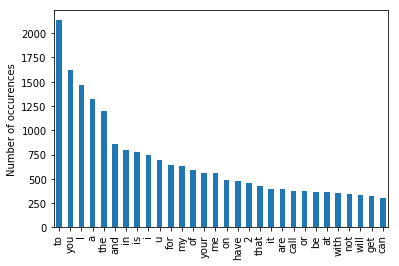

In [5]:
# Visualization of the most frequent words of the dataset
count1 = Counter(" ".join(data["message"]).split()).most_common(30)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words", 1 : "count"})
fig = plt.figure()
ax = fig.add_subplot(111)
df1.plot.bar(ax=ax, legend = False)
xticks = np.arange(len(df1["words"]))
ax.set_xticks(xticks)
ax.set_xticklabels(df1["words"])
ax.set_ylabel('Number of occurences')
plt.show()

### 3. Wordclouds 

In order to have words occurences in each class, we use wordclouds where most frequent words appear the biggest.

In [6]:
# Wordcloud paramters
wc_height, wc_width = (512, 1024)
wc_bckp_color = 'white'
wc_max_words = 400
wc_max_font_size = 60
random_state = 42
wc_figsize = (12, 10)

#### a. Spam class

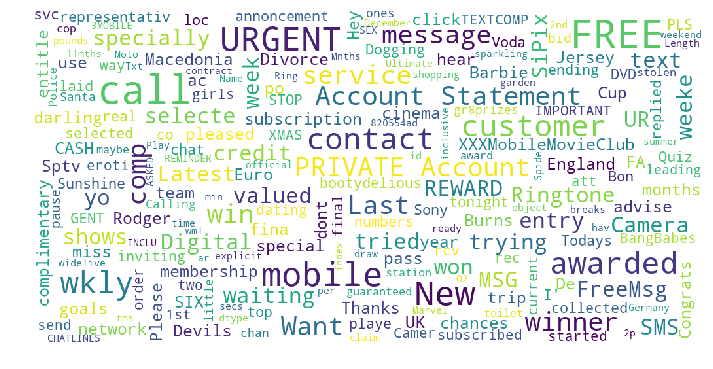

In [7]:
# Extracting spam messages from DataFrame
spam_df = data.loc[data['label'] == 'spam']

# Creating wordcloud for spam
spam_wc = WordCloud(
    height=wc_height, width=wc_width, background_color=wc_bckp_color,
    max_words=wc_max_words, max_font_size=wc_max_font_size,
    random_state=random_state
).generate(str(spam_df['message']))

# Display the wordcloud
fig = plt.figure(figsize=wc_figsize)
plt.imshow(spam_wc)
plt.axis('off')
plt.show()

#### b. Ham class

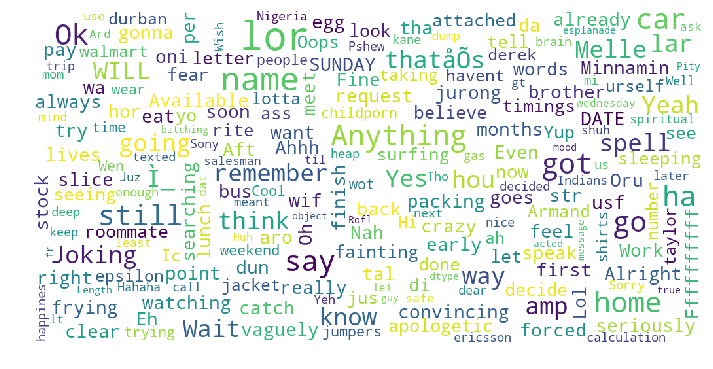

In [8]:
# Extracting ham messages from DataFrame
ham_df = data.loc[data['label'] == 'ham']

# Creating wordcloud for ham
ham_wc = WordCloud(
    height=wc_height, width=wc_width, background_color=wc_bckp_color,
    max_words=wc_max_words, max_font_size=wc_max_font_size,
    random_state=random_state
).generate(str(ham_df['message']))

# Display the wordcloud
fig = plt.figure(figsize=wc_figsize)
plt.imshow(ham_wc)
plt.axis('off')
plt.show()